# E01

## Approach
Find ix given the last two characters.

In [1]:
from operator import concat

import torch

In [2]:
words = list(open('names.txt', 'r').read().splitlines())
words[:3]

['emma', 'olivia', 'ava']

In [3]:
l = ['.'] + sorted(set(i for w in words for i in w))
stoi = {s: i for i, s in enumerate(l)}
itos = {i: s for i, s in enumerate(l)}

In [4]:
# E02
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]


In [5]:
N = torch.zeros([27, 27, 27], dtype=torch.int32)
for w in words_test:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        N[stoi[c1], stoi[c2], stoi[c3]] += 1
N

tensor([[[   0, 3461, 1041,  ...,  103,  423,  739],
         [   0,  159,  160,  ...,   18,  153,  122],
         [   0,  125,    0,  ...,    0,    4,    0],
         ...,
         [   0,   40,    0,  ...,    1,   16,   10],
         [   0,  178,    0,  ...,    0,    0,    1],
         [   0,  353,    0,  ...,    0,   72,    0]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  25,    0,    3,  ...,    0,   18,   10],
         [  28,   21,   11,  ...,    0,   13,    0],
         ...,
         [   7,    6,    0,  ...,   13,    4,    2],
         [ 121,  335,   11,  ...,    0,   10,   23],
         [  29,   90,    0,  ...,    0,   15,   16]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  45,    3,    7,  ...,    3,   23,    4],
         [   1,    5,    0,  ...,    0,    4,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [  39,    6,    2,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

In [6]:
N.shape

torch.Size([27, 27, 27])

In [7]:
N += 1
P = N.float()
P /= P.sum(2, keepdim=True)
P[0]

tensor([[3.8982e-05, 1.3495e-01, 4.0619e-02, 4.8104e-02, 5.2976e-02, 4.9234e-02,
         1.2084e-02, 2.1596e-02, 2.6975e-02, 1.9530e-02, 7.5118e-02, 9.2270e-02,
         4.7363e-02, 7.9250e-02, 3.5551e-02, 1.2864e-02, 1.6567e-02, 2.7677e-03,
         5.1924e-02, 6.5567e-02, 3.9644e-02, 2.6508e-03, 1.2435e-02, 1.0486e-02,
         4.0541e-03, 1.6528e-02, 2.8847e-02],
        [2.8670e-04, 4.5872e-02, 4.6158e-02, 5.4472e-03, 8.3142e-02, 9.7477e-03,
         4.0138e-03, 3.7271e-03, 2.0929e-02, 3.5550e-02, 6.0206e-03, 1.6628e-02,
         1.4106e-01, 7.7408e-02, 1.3303e-01, 2.5803e-03, 4.0138e-03, 2.2936e-03,
         1.1095e-01, 5.5333e-02, 1.5768e-02, 3.8417e-02, 5.4759e-02, 2.0069e-03,
         5.4472e-03, 4.4151e-02, 3.5264e-02],
        [9.3633e-04, 1.1798e-01, 9.3633e-04, 9.3633e-04, 9.3633e-04, 1.9101e-01,
         9.3633e-04, 9.3633e-04, 8.4270e-03, 2.9026e-02, 1.8727e-03, 9.3633e-04,
         6.7416e-02, 9.3633e-04, 9.3633e-04, 5.6180e-02, 9.3633e-04, 9.3633e-04,
         4.8596e-

In [8]:
for i in range(10):
    ix = 0
    out = ['.', '.']
    while True:
        ix = torch.multinomial(P[stoi[out[-2]], stoi[out[-1]]], 1, replacement=True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

..windribbiasir
..jessin
..luagunxjdryknoak
..ruva
..ina
..sht
..kailealailla
..damseill
..zarjeen
..davien


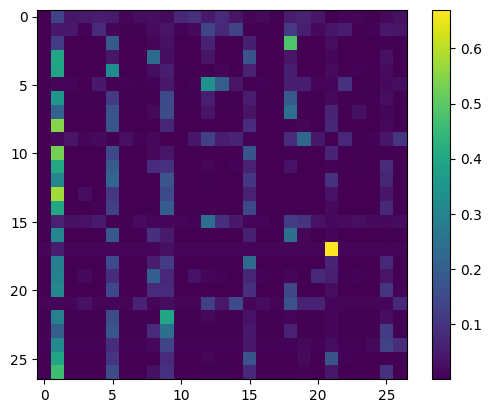

In [9]:
import matplotlib.pyplot as plt

plt.imshow(P[0])
plt.colorbar()

In [10]:
P[0][0]

tensor([3.8982e-05, 1.3495e-01, 4.0619e-02, 4.8104e-02, 5.2976e-02, 4.9234e-02,
        1.2084e-02, 2.1596e-02, 2.6975e-02, 1.9530e-02, 7.5118e-02, 9.2270e-02,
        4.7363e-02, 7.9250e-02, 3.5551e-02, 1.2864e-02, 1.6567e-02, 2.7677e-03,
        5.1924e-02, 6.5567e-02, 3.9644e-02, 2.6508e-03, 1.2435e-02, 1.0486e-02,
        4.0541e-03, 1.6528e-02, 2.8847e-02])

In [11]:
# loss
nll = 0.0
n = 0
for w in words_dev:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        prob = P[stoi[c1], stoi[c2], stoi[c3]]
        nll += -prob.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(101806.9531), 2.2256290912628174


# E02

In [12]:
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]

In [13]:
words_dev

['aryeh',
 'avree',
 'syriyah',
 'kadan',
 'caldwell',
 'olan',
 'tyreon',
 'bryar',
 'shanelle',
 'shraga',
 'maxx',
 'kharson',
 'dhalia',
 'blesson',
 'theory',
 'darleth',
 'yared',
 'faduma',
 'hakan',
 'credence',
 'kaeden',
 'christo',
 'muhammadmustafa',
 'mikayel',
 'dayon',
 'tierra',
 'jermya',
 'jossiah',
 'ahmia',
 'kinzlee',
 'imogen',
 'anaisha',
 'nestor',
 'antonio',
 'ilyssa',
 'bentlee',
 'taheem',
 'dekota',
 'raydan',
 'larayah',
 'arpit',
 'trustin',
 'murat',
 'willamena',
 'athens',
 'kaisyn',
 'tylasia',
 'arkin',
 'zaylah',
 'joss',
 'coda',
 'banyan',
 'mellani',
 'zyriah',
 'mavin',
 'ayelen',
 'keviana',
 'bianka',
 'amram',
 'mohan',
 'rawley',
 'imaad',
 'saransh',
 'dwade',
 'isadore',
 'karri',
 'norianna',
 'berl',
 'shylynn',
 'pranav',
 'javeah',
 'dexton',
 'hugh',
 'agamjot',
 'pressley',
 'morireoluwa',
 'azadeh',
 'drue',
 'leslie',
 'braelin',
 'tyonna',
 'malykai',
 'enas',
 'anyely',
 'aerion',
 'zaylon',
 'iana',
 'jazmynn',
 'baani',
 'hamed

## Bigram Model (Probabilistic)

In [14]:
Nbi = torch.zeros([27, 27])
for w in words:
    word = "." + w + "."
    for c1, c2 in zip(word, word[1:]):
        Nbi[stoi[c1], stoi[c2]] += 1
N

tensor([[[   1, 3462, 1042,  ...,  104,  424,  740],
         [   1,  160,  161,  ...,   19,  154,  123],
         [   1,  126,    1,  ...,    1,    5,    1],
         ...,
         [   1,   41,    1,  ...,    2,   17,   11],
         [   1,  179,    1,  ...,    1,    1,    2],
         [   1,  354,    1,  ...,    1,   73,    1]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  26,    1,    4,  ...,    1,   19,   11],
         [  29,   22,   12,  ...,    1,   14,    1],
         ...,
         [   8,    7,    1,  ...,   14,    5,    3],
         [ 122,  336,   12,  ...,    1,   11,   24],
         [  30,   91,    1,  ...,    1,   16,   17]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  46,    4,    8,  ...,    4,   24,    5],
         [   2,    6,    1,  ...,    1,    5,    1],
         ...,
         [   1,    1,    1,  ...,    1,    1,    1],
         [  40,    7,    3,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1]],

In [15]:
Pbi = (Nbi + 0).float()
Pbi /= Pbi.sum(1, keepdim=True)
Pbi

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [16]:
for i in range(5):
    ix = 0
    out = []
    while True:
        ix = torch.multinomial(Pbi[ix], 1, True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

yn
li
konnacerindilezly
kostaarmaryananil
egrucel


In [17]:
Pbi[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
# loss
nll = 0.
n = 0
for w in words_dev:
    word = "." + w + "."
    for ch1, ch2 in zip(word, word[1:]):
        probs = Pbi[stoi[ch1], stoi[ch2]]
        nll += -probs.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(111505.2109), 2.449479579925537


## Single Neuron Prediction
Bi-gram

In [19]:
xs, ys = [], []
for w in words:
    word = '.' + w + '.'
    for x, y in zip(word, word[1:]):
        xs.append(stoi[x])
        ys.append(stoi[y])
xs[:5], ys[:5]

([0, 5, 13, 13, 1], [5, 13, 13, 1, 0])

In [20]:
import torch.nn.functional as F

xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()
xenc.dtype

torch.float32

In [21]:
W = torch.randn((27, 27), requires_grad=True)
W.shape

torch.Size([27, 27])

In [22]:
for i in range(20):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i+1, loss.item(), sep=": ")

    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


1: 3.6826417446136475
2: 3.3336760997772217
3: 3.1303117275238037
4: 3.0052669048309326
5: 2.914548873901367
6: 2.8463351726531982
7: 2.794785499572754
8: 2.7553188800811768
9: 2.7243497371673584
10: 2.6992852687835693
11: 2.6784093379974365
12: 2.660627841949463
13: 2.6452343463897705
14: 2.6317496299743652
15: 2.619833469390869
16: 2.609232187271118
17: 2.599748134613037
18: 2.5912230014801025
19: 2.5835280418395996
20: 2.576554298400879


In [23]:
g = torch.Generator().manual_seed(2147483647)

out = ["."]
while True:
    ix = stoi[out[-1]]
    x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = x @ W
    count = logits.exp()
    prob = count / count.sum(1, keepdim=True)
    pred = prob.multinomial(num_samples=1, replacement=True, generator=g)
    out.append(itos[pred.item()])
    if out[-1] == ".":
        break
print(*out, sep="")

.cexza.


Tri-gram

In [24]:
sstoi = {}

n = 0
for i in range(27):
    for j in range(27):
        sstoi[(i, j)] = n
        n += 1

In [25]:
xss = []
ys = []

for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        xss.append(sstoi[(stoi[c1], stoi[c2])])
        ys.append(stoi[c3])

In [26]:
xs = F.one_hot(torch.tensor(xss), num_classes=n).float()
W = torch.randn([729, 27], requires_grad=True)

In [27]:

for i in range(10):
    logits = xs @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i, loss, sep=": ")
    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


0: tensor(3.7340, grad_fn=<NegBackward0>)
1: tensor(3.6505, grad_fn=<NegBackward0>)
2: tensor(3.5822, grad_fn=<NegBackward0>)
3: tensor(3.5218, grad_fn=<NegBackward0>)
4: tensor(3.4673, grad_fn=<NegBackward0>)
5: tensor(3.4172, grad_fn=<NegBackward0>)
6: tensor(3.3707, grad_fn=<NegBackward0>)
7: tensor(3.3275, grad_fn=<NegBackward0>)
8: tensor(3.2871, grad_fn=<NegBackward0>)
9: tensor(3.2495, grad_fn=<NegBackward0>)


In [28]:
out = [".", "."]

In [29]:
xs.shape

torch.Size([228146, 729])

In [30]:
t = torch.tensor([[1, 2, 3], [12, 13, 14]])
s = torch.tensor([[1, 2], [2, 3], [3, 4]])
t @ s

tensor([[ 14,  20],
        [ 80, 119]])

In [31]:
out = ['.', '.']
while True:
    ix = sstoi[(stoi[out[-2]], stoi[out[-1]])]
    x = F.one_hot(torch.tensor([ix]), num_classes=n).float()
    logits = x @ W
    count = logits.exp()
    probs = count / count.sum(1, keepdim=True)
    pred = probs.multinomial(1, True).item()
    out.append(itos[pred])
    if out[-1] == '.':
        break
print(*out, sep="")

..cr.


### 1x54 approach
TODO

In [46]:
xs = []
ys = []
for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        ys.append(stoi[c3])
        x1 = list(F.one_hot(torch.tensor(stoi[c1]), num_classes=27).data)
        x1.extend(list(F.one_hot(torch.tensor(stoi[c2]), num_classes=27).data))
        xs.append(x1)
        # print(len(xs[len(xs)-1]))


# print(xs[0])
# xs_f = torch.tensor([xs])
ys = torch.tensor(ys)
xs = torch.tensor(xs).float()


In [47]:
x1[:5]

[tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]

x1 -> 27

x2 -> 27

x1 + x2 -> 54

[[54], [54], ...]

In [48]:
W = torch.randn((54, 27), requires_grad=True)

In [78]:
for i in range(20):
    logits = xs @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(len(xs)), ys].log().mean() # TODO: IMPORTANT. loss function is wrong
    print(i+1, loss, sep=": ")


    W.grad = None
    loss.backward()
    W.data -= 15 * W.grad
# 2.3460

1: tensor(2.3463, grad_fn=<NegBackward0>)
2: tensor(2.3463, grad_fn=<NegBackward0>)
3: tensor(2.3462, grad_fn=<NegBackward0>)
4: tensor(2.3462, grad_fn=<NegBackward0>)
5: tensor(2.3462, grad_fn=<NegBackward0>)
6: tensor(2.3462, grad_fn=<NegBackward0>)
7: tensor(2.3462, grad_fn=<NegBackward0>)
8: tensor(2.3462, grad_fn=<NegBackward0>)
9: tensor(2.3461, grad_fn=<NegBackward0>)
10: tensor(2.3461, grad_fn=<NegBackward0>)
11: tensor(2.3461, grad_fn=<NegBackward0>)
12: tensor(2.3461, grad_fn=<NegBackward0>)
13: tensor(2.3461, grad_fn=<NegBackward0>)
14: tensor(2.3461, grad_fn=<NegBackward0>)
15: tensor(2.3460, grad_fn=<NegBackward0>)
16: tensor(2.3460, grad_fn=<NegBackward0>)
17: tensor(2.3460, grad_fn=<NegBackward0>)
18: tensor(2.3460, grad_fn=<NegBackward0>)
19: tensor(2.3460, grad_fn=<NegBackward0>)
20: tensor(2.3460, grad_fn=<NegBackward0>)


In [79]:
xs.shape

torch.Size([228146, 54])

In [ ]:
# generator

for w in words:
    word = ".." + w + "."
    n = 0
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        x = list(F.one_hot(stoi[c1]).data)
        x.extend(list(F.one_hot(stoi[c1]).data))
        logits = x @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)

        # multinomial function to pick one
        ix = probs.multinomial(num_samples=1, replacement=True)

    break

